# Question - 01

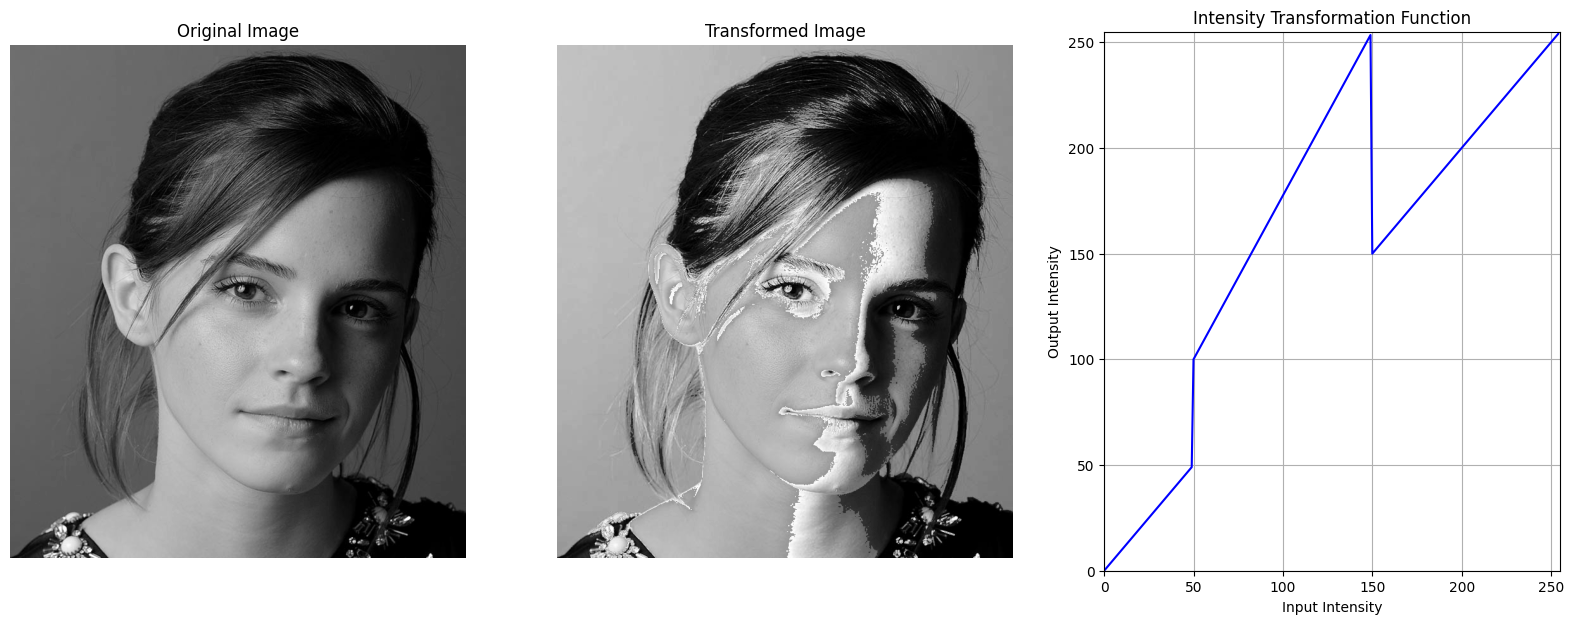

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the grayscale image
image = io.imread('./a1images/a1images/emma.jpg', as_gray=True)

image_scaled = (image * 255).astype(np.uint8)

def transform_intensity(I_in):
    if I_in < 50:
        return I_in
    elif I_in < 150:
        return 100 + (255-100)/(100) * (I_in-50)
    else:
        return I_in

# Aply the transformation and plotting
transformed_image = np.vectorize(transform_intensity)(image_scaled)

transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

transformed_image_rescaled = transformed_image / 255.0
input_intensities = np.arange(0, 255)

output_intensities = np.array([transform_intensity(i) for i in input_intensities])

plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(transformed_image_rescaled, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(input_intensities, output_intensities, 'b')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.show()


# Question - 02

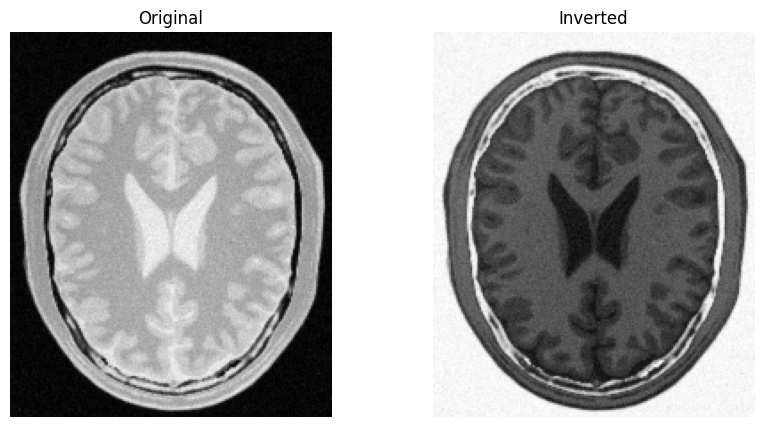

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load image (grayscale or RGB)
image = io.imread('./a1images/a1images/brain_proton_density_slice.png')

# Invert the image: subtract from 255
inverted_image = 255 - image

# Display
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray' if len(inverted_image.shape) == 2 else None)
plt.title('Inverted')
plt.axis('off')

plt.show()

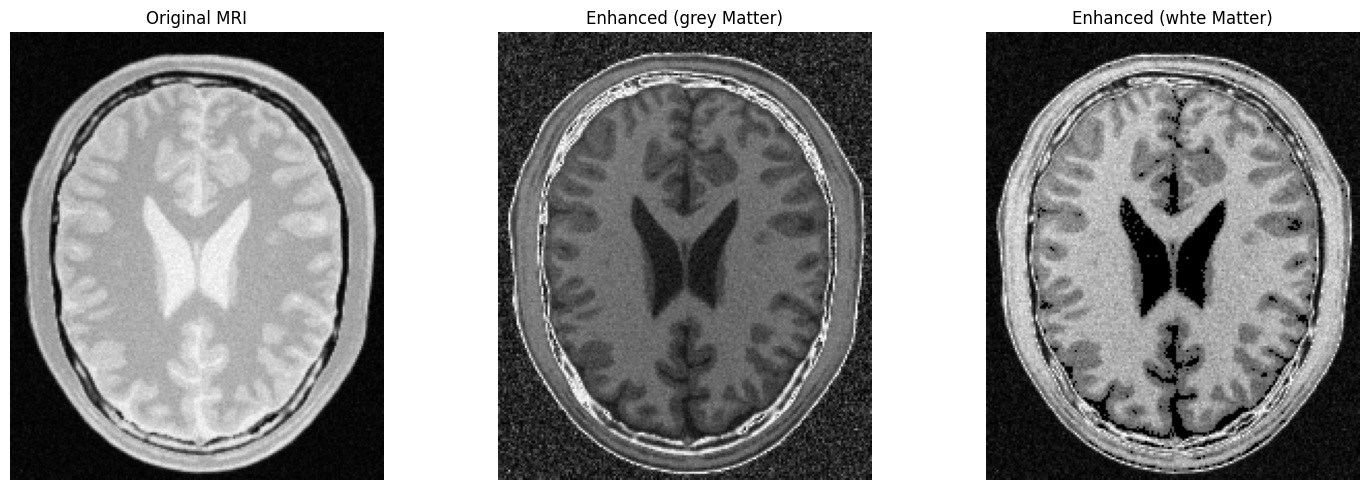

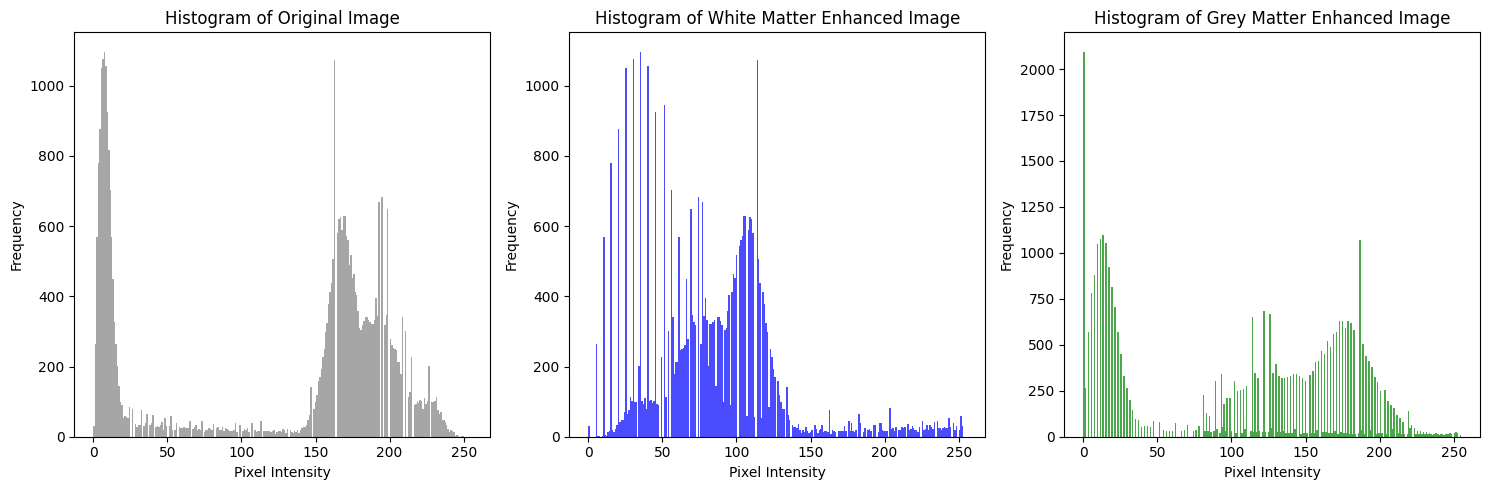

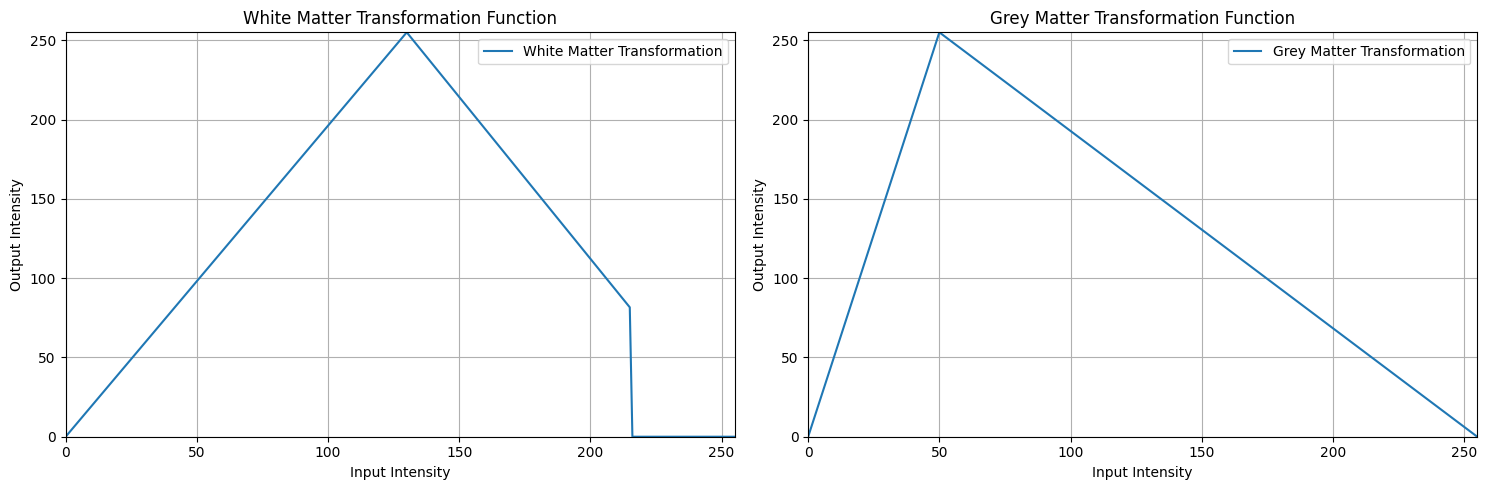

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

# Load the MRI image
image = io.imread('./a1images/a1images/brain_proton_density_slice.png', as_gray=True)
if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)
else:
    image = image.astype(np.uint8)

def grey_matter(I_in):
    peak = 50
    max_output = 255
    if I_in < peak:
        return (max_output / peak) * I_in  
        return max_output
    else:
        return max_output - ((I_in - peak) * (max_output / (255 - peak)))

def white_matter(I_in):
    peak = 130
    max_output = 255
    if I_in> 215:
        return 0
    elif I_in < peak:
        return (max_output / peak) * I_in
    elif I_in == peak:
        return max_output
    else:
        return max_output - ((I_in - peak) * (max_output / (255 - peak)))

# Vectorize the transformations
vec_transform1 = np.vectorize(grey_matter)
enhanced1 = vec_transform1(image)
enhanced1 = np.clip(enhanced1, 0, 255).astype(np.uint8)

vec_transform2 = np.vectorize(white_matter)
enhanced2 = vec_transform2(image)
enhanced2 = np.clip(enhanced2, 0, 255).astype(np.uint8)

# Apply histogram equalization to enhanced2
enhanced_eq = exposure.equalize_hist(enhanced2)
enhanced_eq = (enhanced_eq * 255).astype(np.uint8)

# Plot the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original MRI')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(enhanced1, cmap='gray')
plt.title('Enhanced (grey Matter)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(enhanced2, cmap='gray')
plt.title('Enhanced (whte Matter)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the transformation functions
input_intensities = np.arange(0, 256)
output_white_matter = np.array([white_matter(i) for i in input_intensities])
output_grey_matter = np.array([grey_matter(i) for i in input_intensities])

# Plot histograms
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(image.ravel(), bins=256, range=(0, 255), color='gray', alpha=0.7)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(enhanced1.ravel(), bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram of White Matter Enhanced Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(enhanced2.ravel(), bins=256, range=(0, 255), color='green', alpha=0.7)
plt.title('Histogram of Grey Matter Enhanced Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(input_intensities, output_white_matter, label='White Matter Transformation')
plt.title('White Matter Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.subplot(1, 2, 2)
plt.plot(input_intensities, output_grey_matter, label='Grey Matter Transformation')
plt.title('Grey Matter Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.legend()
plt.grid(True)
plt.xlim(0, 255)
plt.ylim(0, 255)

plt.tight_layout()
plt.show()

# Question - 03

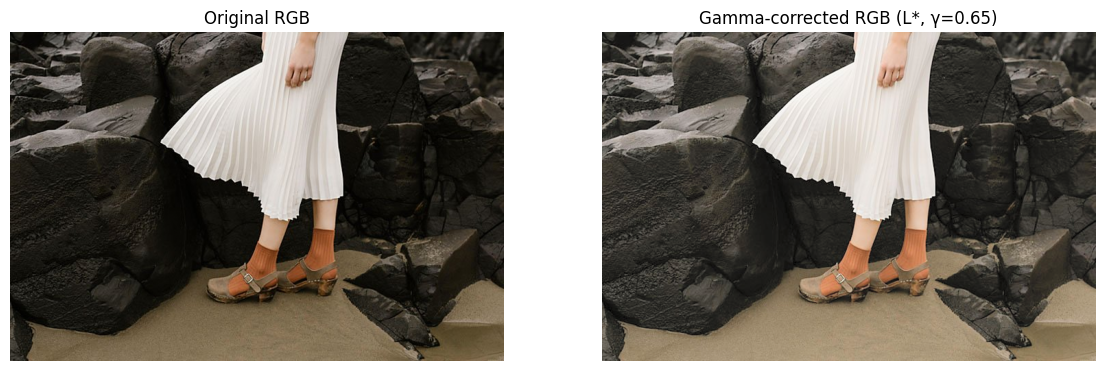

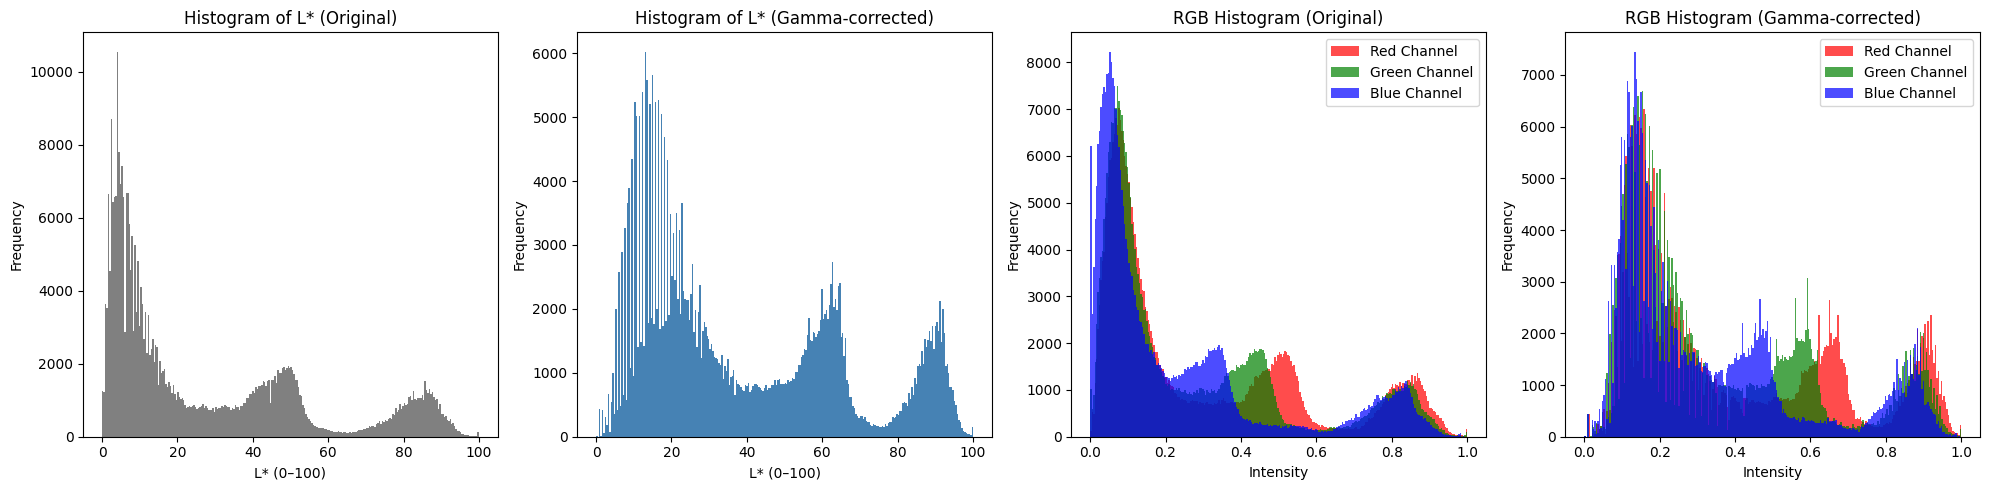

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

image_rgb = io.imread('./a1images/a1images/highlights_and_shadows.jpg')
image_rgb = img_as_float(image_rgb)

# Convert to LAB
image_lab = color.rgb2lab(image_rgb)
L_original = image_lab[..., 0] 
a_channel = image_lab[..., 1]
b_channel = image_lab[..., 2]

# Gamma correction
gamma_value = 0.65
L_norm = np.clip(L_original / 100.0, 0.0, 1.0)
L_corrected = 100.0 * np.power(L_norm, gamma_value)

# Reconstruct
lab_corrected = np.dstack([L_corrected, a_channel, b_channel])
image_corrected_rgb = np.clip(color.lab2rgb(lab_corrected), 0.0, 1.0)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 15))

axes[0].imshow(image_rgb)
axes[0].set_title('Original RGB')
axes[0].axis('off')

axes[1].imshow(image_corrected_rgb)
axes[1].set_title(f'Gamma-corrected RGB (L*, γ={gamma_value})')
axes[1].axis('off')

fig, axes = plt.subplots(1,4, figsize=(20, 5))
axes[0].hist(L_original.ravel(), bins=256, range=(0, 100), color='gray')
axes[0].set_title('Histogram of L* (Original)')
axes[0].set_xlabel('L* (0–100)')
axes[0].set_ylabel('Frequency')

axes[1].hist(L_corrected.ravel(), bins=256, range=(0, 100), color='steelblue')
axes[1].set_title('Histogram of L* (Gamma-corrected)')
axes[1].set_xlabel('L* (0–100)')
axes[1].set_ylabel('Frequency')

colors = ['red', 'green', 'blue']
for i, c in enumerate(colors):
    axes[2].hist(image_rgb[..., i].ravel(), bins=256, color=c, alpha=0.7, label=f'{c.capitalize()} Channel')
axes[2].set_title('RGB Histogram (Original)')
axes[2].set_xlabel('Intensity')
axes[2].set_ylabel('Frequency')
axes[2].legend()

for i, c in enumerate(colors):
    axes[3].hist(image_corrected_rgb[..., i].ravel(), bins=256, color=c, alpha=0.7, label=f'{c.capitalize()} Channel')
axes[3].set_title('RGB Histogram (Gamma-corrected)')
axes[3].set_xlabel('Intensity')
axes[3].set_ylabel('Frequency')
axes[3].legend()

plt.tight_layout()
plt.show()

# Question - 04

Chosen value of a: 0.5

Testing values of a:


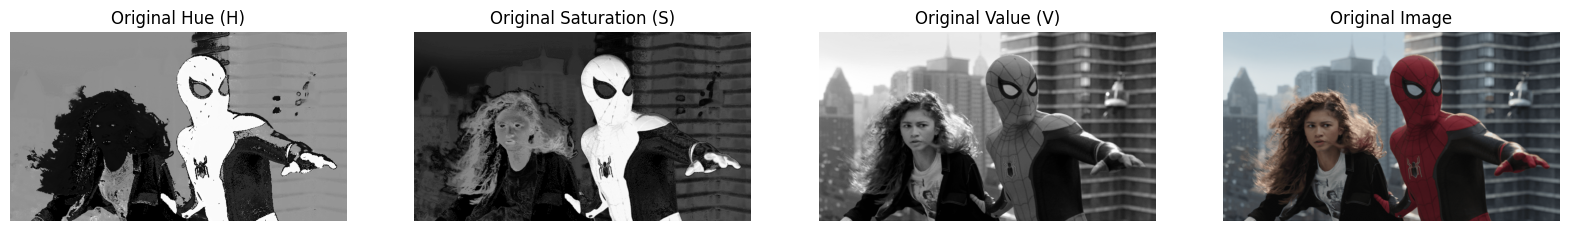

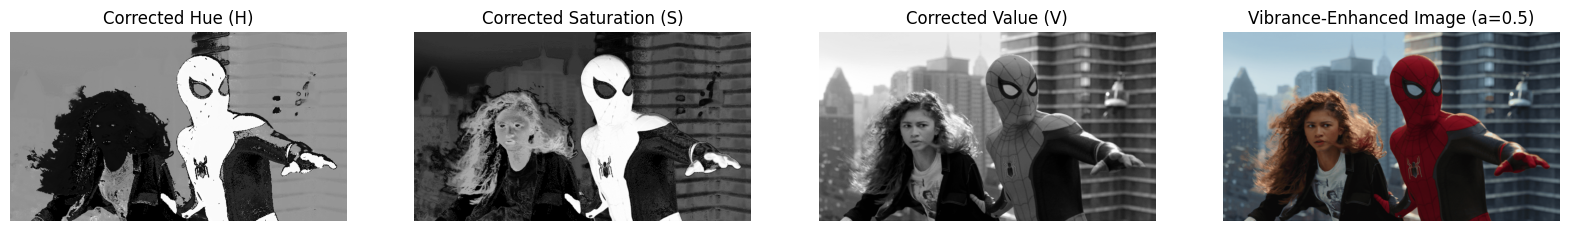

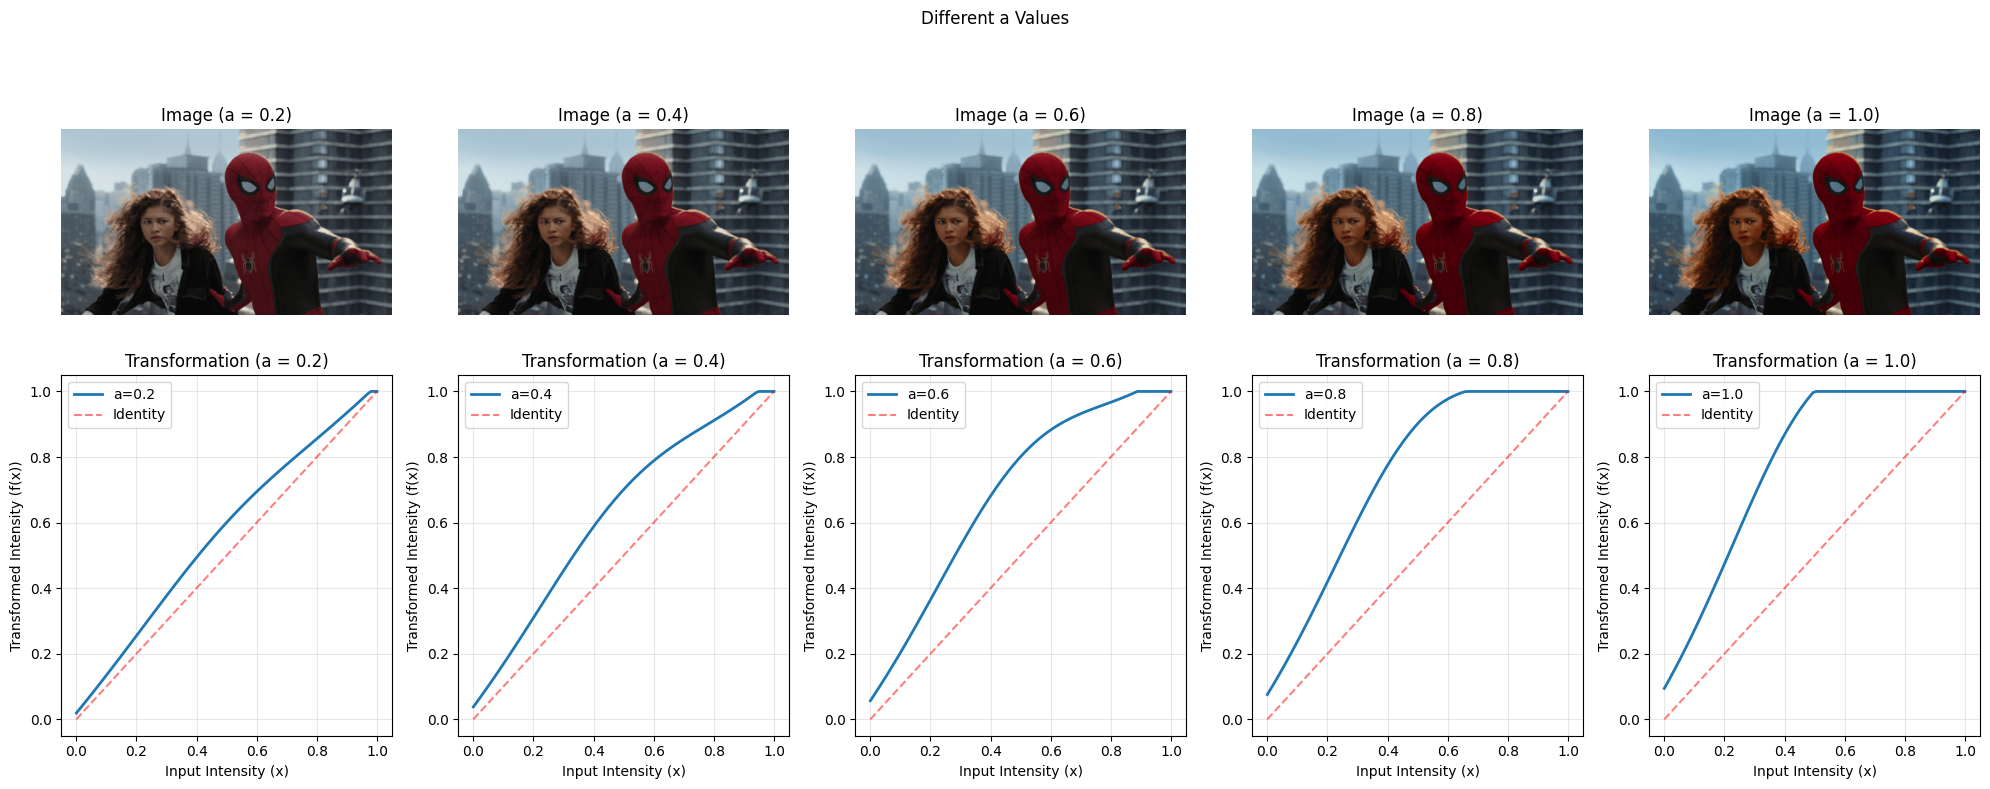

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

image_rgb = io.imread('./a1images/a1images/spider.png')
image_rgb = img_as_float(image_rgb)

image_hsv = color.rgb2hsv(image_rgb)
H_original, S_original, V_original = image_hsv[..., 0], image_hsv[..., 1], image_hsv[..., 2]

def intensity_transformation(x, a, sigma=70):
    x_scaled = x * 255
    transformed = x_scaled + a * 128 * np.exp(-(x_scaled - 128)**2 / (2 * sigma**2))
    transformed = np.clip(transformed, 0, 255)
    return transformed / 255


a = 0.5


S_transformed = intensity_transformation(S_original, a)
image_hsv_transformed = np.dstack((H_original, S_transformed, V_original))
image_rgb_transformed = color.hsv2rgb(image_hsv_transformed)

H_corrected, S_corrected, V_corrected = image_hsv_transformed[..., 0], image_hsv_transformed[..., 1], image_hsv_transformed[..., 2]

fig = plt.figure(figsize=(20, 15))

plt.subplot(1, 4, 1)
plt.imshow(H_original, cmap='gray', vmin=0, vmax=1)
plt.title('Original Hue (H)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(S_original, cmap='gray')
plt.title('Original Saturation (S)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(V_original, cmap='gray')
plt.title('Original Value (V)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

fig = plt.figure(figsize=(20, 15))

plt.subplot(1, 4, 1)
plt.imshow(H_corrected, cmap='gray', vmin=0, vmax=1)
plt.title('Corrected Hue (H)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(S_corrected, cmap='gray')
plt.title('Corrected Saturation (S)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(V_corrected, cmap='gray')
plt.title('Corrected Value (V)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(image_rgb_transformed)
plt.title(f'Vibrance-Enhanced Image (a={a})')
plt.axis('off')

print(f"Chosen value of a: {a}")

print("\nTesting values of a:")
test_a_values = [0.2, 0.4, 0.6, 0.8, 1.0]
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, test_a in enumerate(test_a_values):
    S_test = intensity_transformation(S_original, test_a)
    image_hsv_test = np.dstack((H_original, S_test, V_original))
    image_rgb_test = color.hsv2rgb(image_hsv_test)
    
    axes[0, i].imshow(image_rgb_test)
    axes[0, i].set_title(f'Image (a = {test_a})')
    axes[0, i].axis('off')

x_curve = np.linspace(0, 1, 100)
for i, test_a in enumerate(test_a_values):
    y_curve = intensity_transformation(x_curve, test_a)
    axes[1, i].plot(x_curve, y_curve, linewidth=2, label=f'a={test_a}')
    axes[1, i].plot([0, 1], [0, 1], 'r--', alpha=0.5, label='Identity')
    axes[1, i].set_title(f'Transformation (a = {test_a})')
    axes[1, i].set_xlabel('Input Intensity (x)')
    axes[1, i].set_ylabel('Transformed Intensity (f(x))')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Different a Values')
plt.tight_layout()
plt.show()

# Question - 05

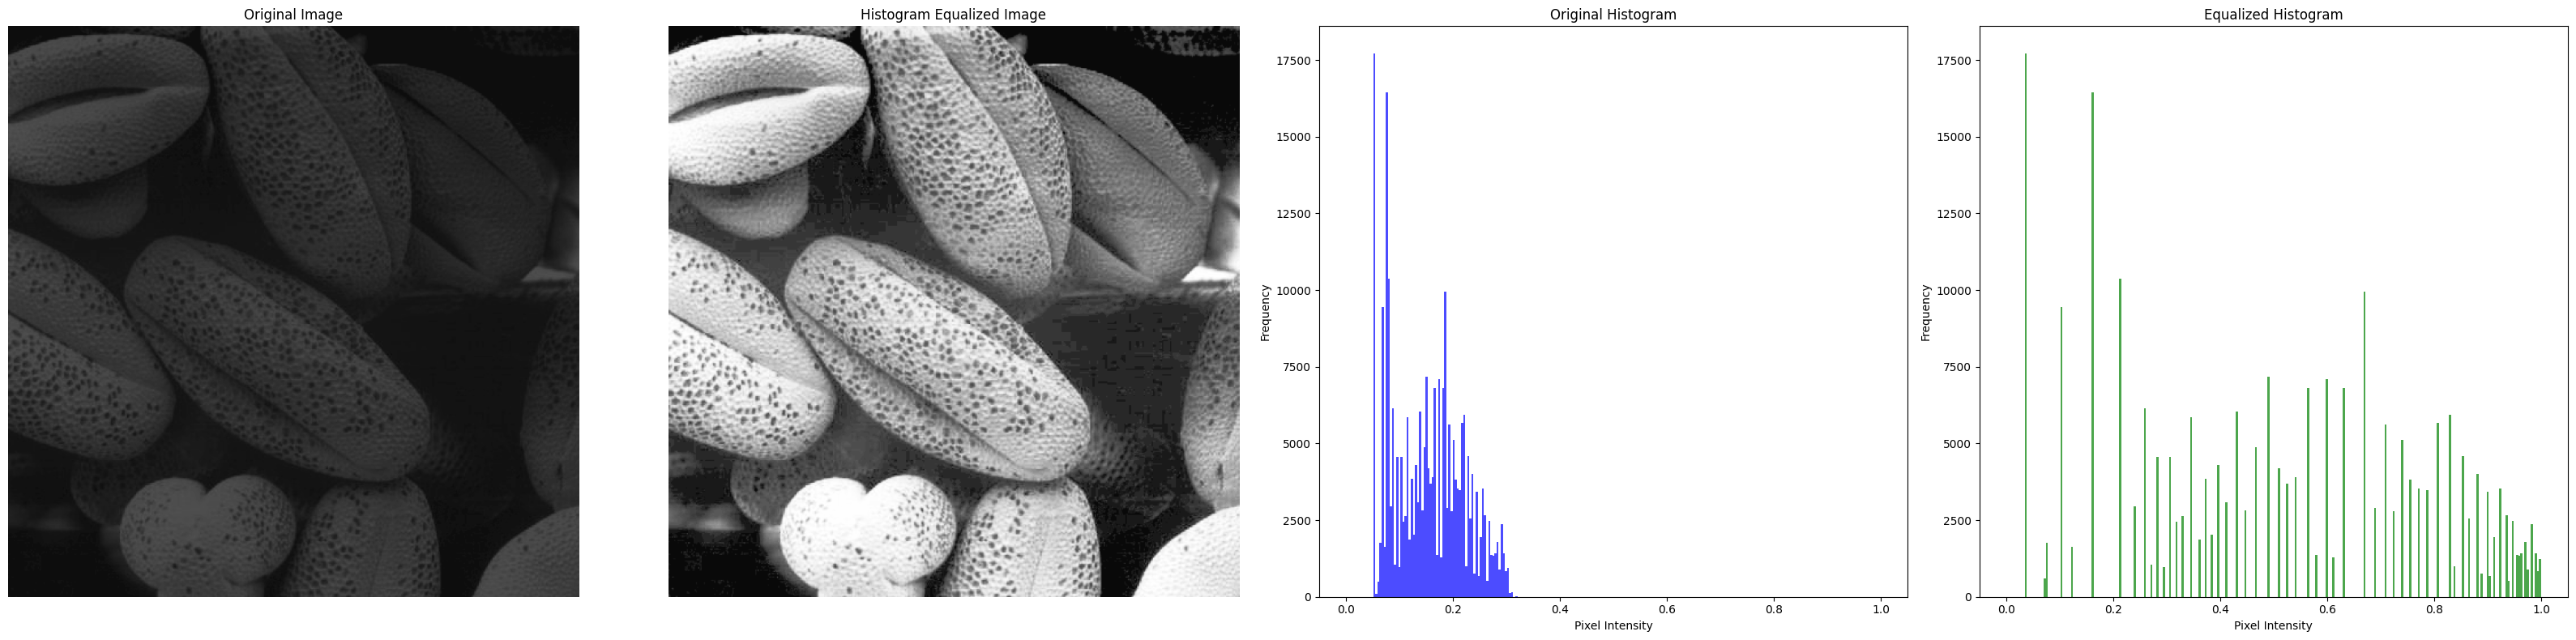

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.color import rgb2gray
import os

def load_tiff_image(main_path, backup_paths=None):
    if os.path.exists(main_path):
        return io.imread(main_path)
    
    if backup_paths:
        for path in backup_paths:
            if os.path.exists(path):
                return io.imread(path)
    return None

def prepare_display_image(original_image):
    if original_image.dtype == np.uint16:
        display_image = (original_image.astype(np.float32) / 65535.0 * 255).astype(np.uint8)
    elif original_image.dtype == np.uint8:
        display_image = original_image.copy()
    else:
        min_val, max_val = original_image.min(), original_image.max()
        if max_val > 1.0:
            display_image = ((original_image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
        else:
            display_image = (original_image * 255).astype(np.uint8)
    
    return display_image

main_path = './a1images/a1images/shells.tif'
backup_paths = ['./a1images/shells.tif', './shells.tif', 'shells.tif']

tiff_image = load_tiff_image(main_path, backup_paths)

if tiff_image is None:
    print("ERROR: Could not find image file!")
    exit()

if len(tiff_image.shape) == 3:
    grayscale_image = rgb2gray(tiff_image)
else:
    grayscale_image = tiff_image.copy()

original_display = prepare_display_image(grayscale_image)
normalized_image = img_as_float(grayscale_image)
flattened_pixels = normalized_image.ravel()

pixel_histogram, bin_edges = np.histogram(flattened_pixels, bins=256, range=(0, 1))
cumulative_distribution = pixel_histogram.cumsum()
normalized_cdf = cumulative_distribution / cumulative_distribution.max()

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
equalized_pixels = np.interp(flattened_pixels, bin_centers, normalized_cdf)
equalized_image = equalized_pixels.reshape(normalized_image.shape)
equalized_display = (equalized_image * 255).astype(np.uint8)

fig, axes = plt.subplots(1, 4, figsize=(32, 8))

axes[0].imshow(original_display, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(equalized_display, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Histogram Equalized Image')
axes[1].axis('off')

axes[2].hist(flattened_pixels, bins=256, range=(0, 1), color='blue', alpha=0.7)
axes[2].set_title('Original Histogram')
axes[2].set_xlabel('Pixel Intensity')
axes[2].set_ylabel('Frequency')

axes[3].hist(equalized_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.7)
axes[3].set_title('Equalized Histogram')
axes[3].set_xlabel('Pixel Intensity')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Question - 06

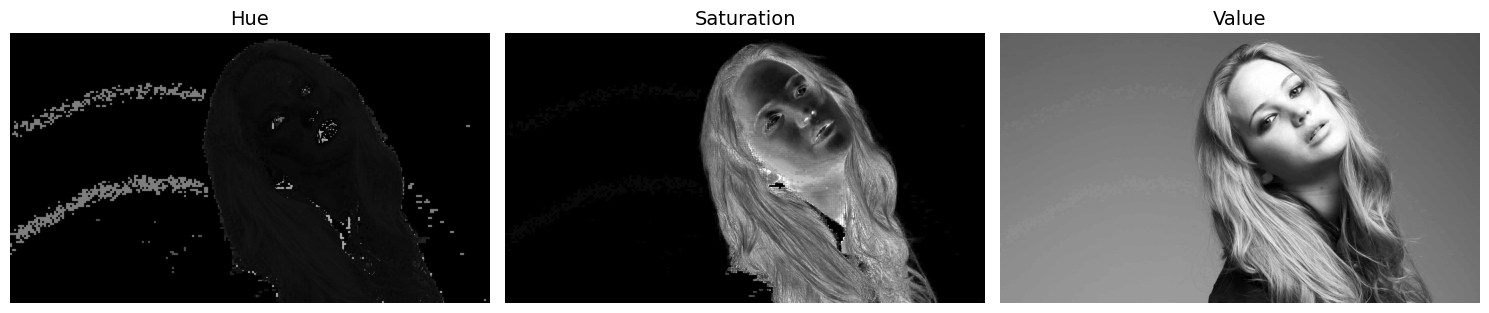

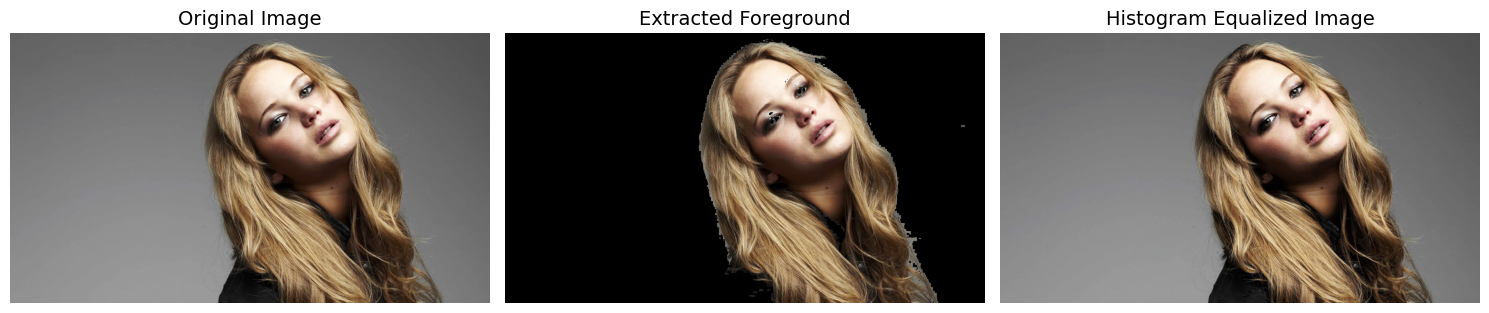

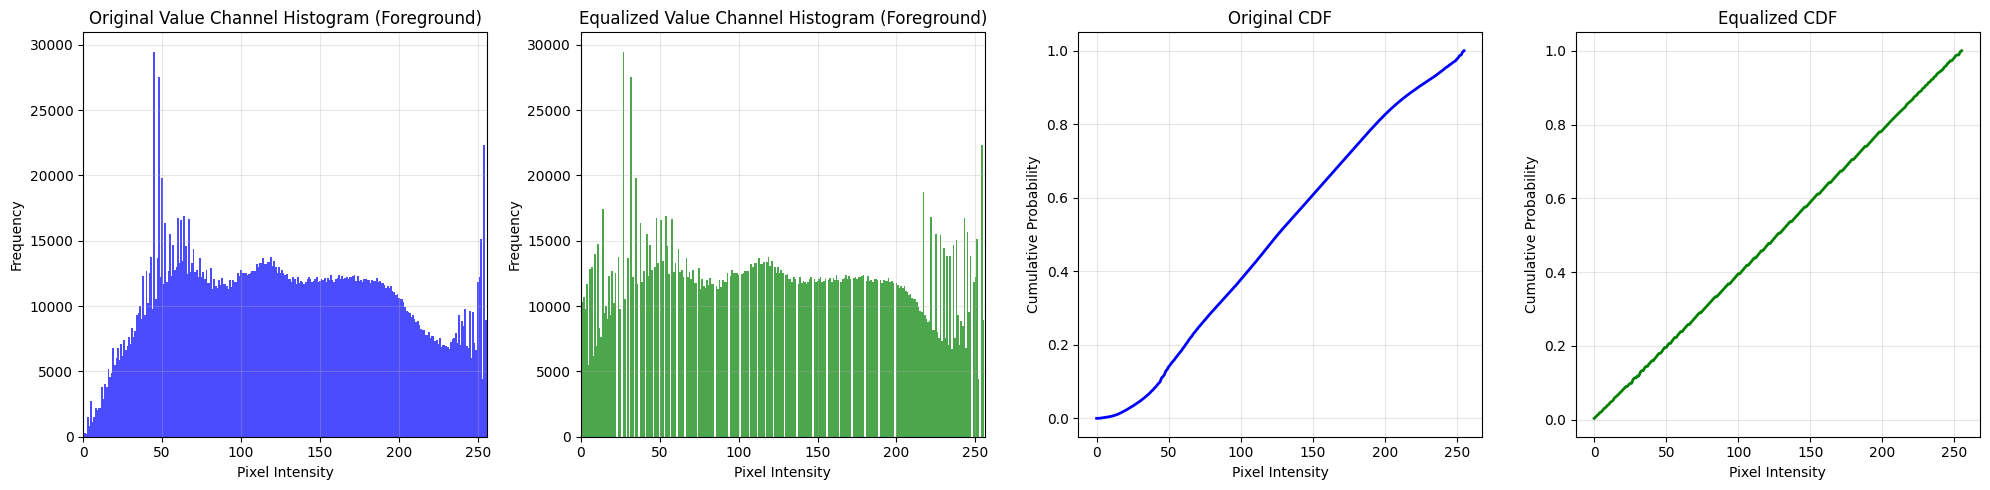

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalize_with_mask(channel, mask):
    foreground_pixels = channel[mask > 0]
    if len(foreground_pixels) == 0:
        return channel, None, None
    hist = cv.calcHist([channel], [0], mask, [256], [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    lookup_table = cdf_normalized.astype(np.uint8)
    equalized_channel = channel.copy()
    equalized_channel[mask > 0] = lookup_table[foreground_pixels]
    return equalized_channel, hist, cdf

jennifer = cv.imread('./a1images/a1images/jeniffer.jpg')
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
H, S, V = cv.split(jennifer_hsv)

saturation_threshold = 12
_, mask = cv.threshold(S, saturation_threshold, 255, cv.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

foreground_black_bg = jennifer.copy()
foreground_black_bg[mask == 0] = [0, 0, 0]

equalized_V, hist_original, cdf_original = histogram_equalize_with_mask(V, mask)

equalized_hsv = jennifer_hsv.copy()
equalized_hsv[:, :, 2] = equalized_V
equalized_image = cv.cvtColor(equalized_hsv, cv.COLOR_HSV2BGR)

equalized_foreground_black_bg = equalized_image.copy()
equalized_foreground_black_bg[mask == 0] = [0, 0, 0]


fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue', fontsize=14)
ax[0].axis("off")

ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation', fontsize=14)
ax[1].axis("off")

ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value', fontsize=14)
ax[2].axis("off")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(cv.cvtColor(jennifer, cv.COLOR_BGR2RGB))
axes[0].set_title('Original Image', fontsize=14)
axes[0].axis('off')

axes[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axes[1].set_title('Extracted Foreground', fontsize=14)
axes[1].axis('off')

axes[2].imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
axes[2].set_title('Histogram Equalized Image', fontsize=14)
axes[2].axis('off')


plt.tight_layout()
plt.show()

foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

hist_original_fg = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

equalized_V_fg = equalized_V.copy()
hist_equalized_fg = cv.calcHist([equalized_V_fg], [0], mask, [256], [0, 256])

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

x_positions = np.arange(len(hist_original_fg))
axes[0].bar(x_positions, hist_original_fg.flatten(), color='blue', width=1, alpha=0.7)
axes[0].set_title('Original Value Channel Histogram (Foreground)', fontsize=12)
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim([0, 256])
axes[0].grid(True, alpha=0.3)

axes[1].bar(x_positions, hist_equalized_fg.flatten(), color='green', width=1, alpha=0.7)
axes[1].set_title('Equalized Value Channel Histogram (Foreground)', fontsize=12)
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim([0, 256])
axes[1].grid(True, alpha=0.3)

if cdf_original is not None:
    cdf_normalized = cdf_original / cdf_original[-1]
    axes[2].plot(cdf_normalized.flatten(), color='blue', linewidth=2)
    axes[2].set_title('Original CDF', fontsize=12)
    axes[2].set_xlabel('Pixel Intensity')
    axes[2].set_ylabel('Cumulative Probability')
    axes[2].grid(True, alpha=0.3)

cdf_equalized = hist_equalized_fg.cumsum()
if len(cdf_equalized) > 0 and cdf_equalized[-1] > 0:
    cdf_eq_normalized = cdf_equalized / cdf_equalized[-1]
    axes[3].plot(cdf_eq_normalized.flatten(), color='green', linewidth=2)
    axes[3].set_title('Equalized CDF', fontsize=12)
    axes[3].set_xlabel('Pixel Intensity') 
    axes[3].set_ylabel('Cumulative Probability')
    axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Question - 07

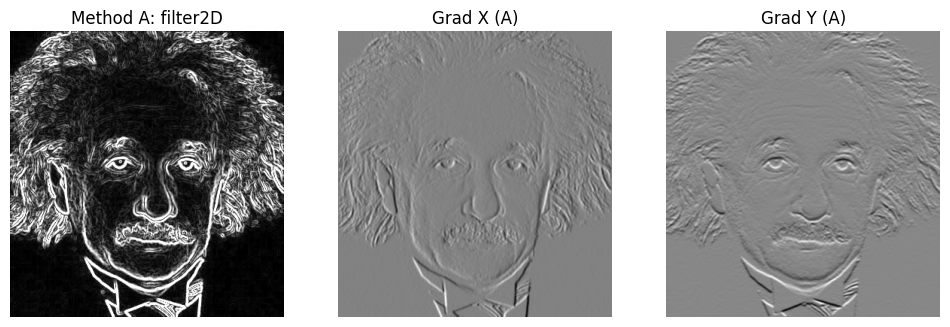

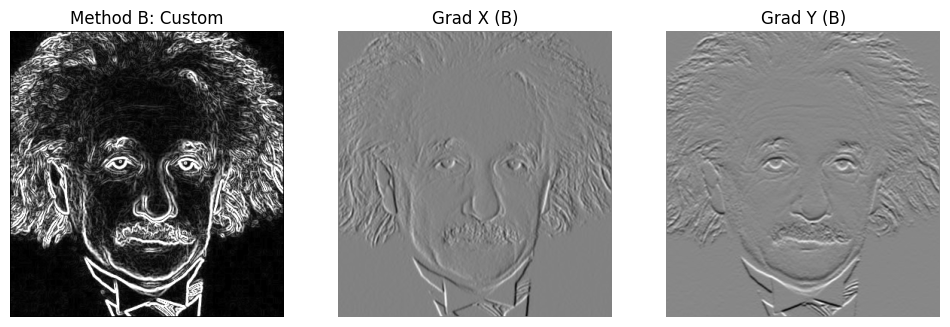

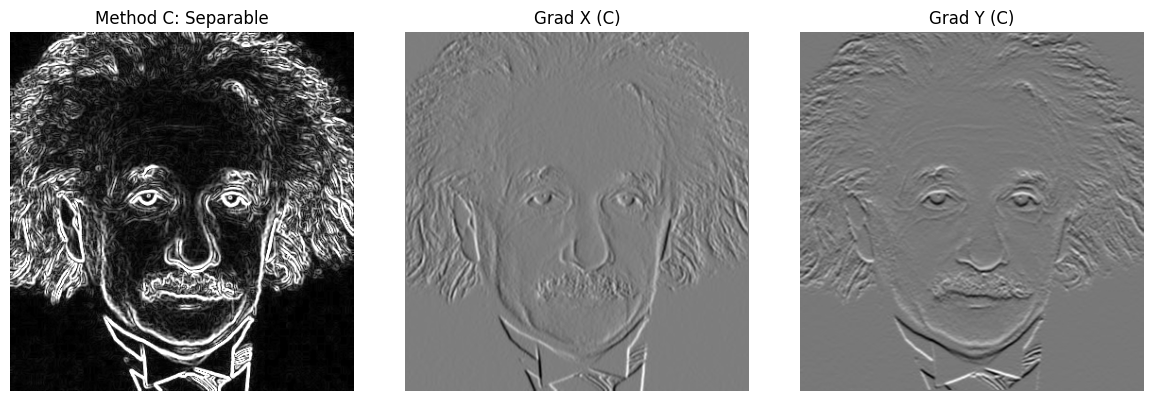

In [29]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image
import os

def sobel_filter_method_a(image):

    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]], dtype=np.float32)

    grad_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)

    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return magnitude, grad_x, grad_y

def sobel_filter_method_b(image):

    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]], dtype=np.float32)

    rows, cols = image.shape
    
    grad_x = np.zeros((rows, cols), dtype=np.float32)
    grad_y = np.zeros((rows, cols), dtype=np.float32)

    img_float = image.astype(np.float32)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            neighborhood = img_float[i-1:i+2, j-1:j+2]
            grad_x[i, j] = np.sum(neighborhood * sobel_x)
            grad_y[i, j] = np.sum(neighborhood * sobel_y)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return magnitude, grad_x, grad_y

def sobel_filter_method_c(image):

    vertical_smooth = np.array([[1], [2], [1]], dtype=np.float32)
    horizontal_diff = np.array([[1, 0, -1]], dtype=np.float32)

    vertical_diff = np.array([[1], [0], [-1]], dtype=np.float32)
    horizontal_smooth = np.array([[1, 2, 1]], dtype=np.float32)
    
    img_float = image.astype(np.float32)
    
    temp_x = cv2.filter2D(img_float, cv2.CV_32F, vertical_smooth)
    grad_x = cv2.filter2D(temp_x, cv2.CV_32F, horizontal_diff)
    
    temp_y = cv2.filter2D(img_float, cv2.CV_32F, vertical_diff)
    grad_y = cv2.filter2D(temp_y, cv2.CV_32F, horizontal_smooth)
    
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return magnitude, grad_x, grad_y

def compare_methods(image):
    mag_a, gx_a, gy_a = sobel_filter_method_a(image)
    mag_b, gx_b, gy_b = sobel_filter_method_b(image)
    mag_c, gx_c, gy_c = sobel_filter_method_c(image)
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(mag_a, cmap='gray')
    plt.title('Method A: filter2D')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(gx_a, cmap='gray')
    plt.title('Grad X (A)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(gy_a, cmap='gray')
    plt.title('Grad Y (A)')
    plt.axis('off')
    
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(mag_b, cmap='gray')
    plt.title('Method B: Custom')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gx_b, cmap='gray')
    plt.title('Grad X (B)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(gy_b, cmap='gray')
    plt.title('Grad Y (B)')
    plt.axis('off')

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(mag_c, cmap='gray')
    plt.title('Method C: Separable')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(gx_c, cmap='gray')
    plt.title('Grad X (C)')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(gy_c, cmap='gray')
    plt.title('Grad Y (C)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return mag_a, mag_b, mag_c

def main():
    image = cv2.imread('./a1images/a1images/einstein.png', cv2.IMREAD_GRAYSCALE)
    results = compare_methods(image)

if __name__ == "__main__":
    main()

# Question - 08

SSD for im01small.png (Nearest Neighbor): 408.80715
SSD for im02small.png (Nearest Neighbor): 79.33826
SSD for im01small.png (Bilinear): 345.27570
SSD for im02small.png (Bilinear): 55.03775


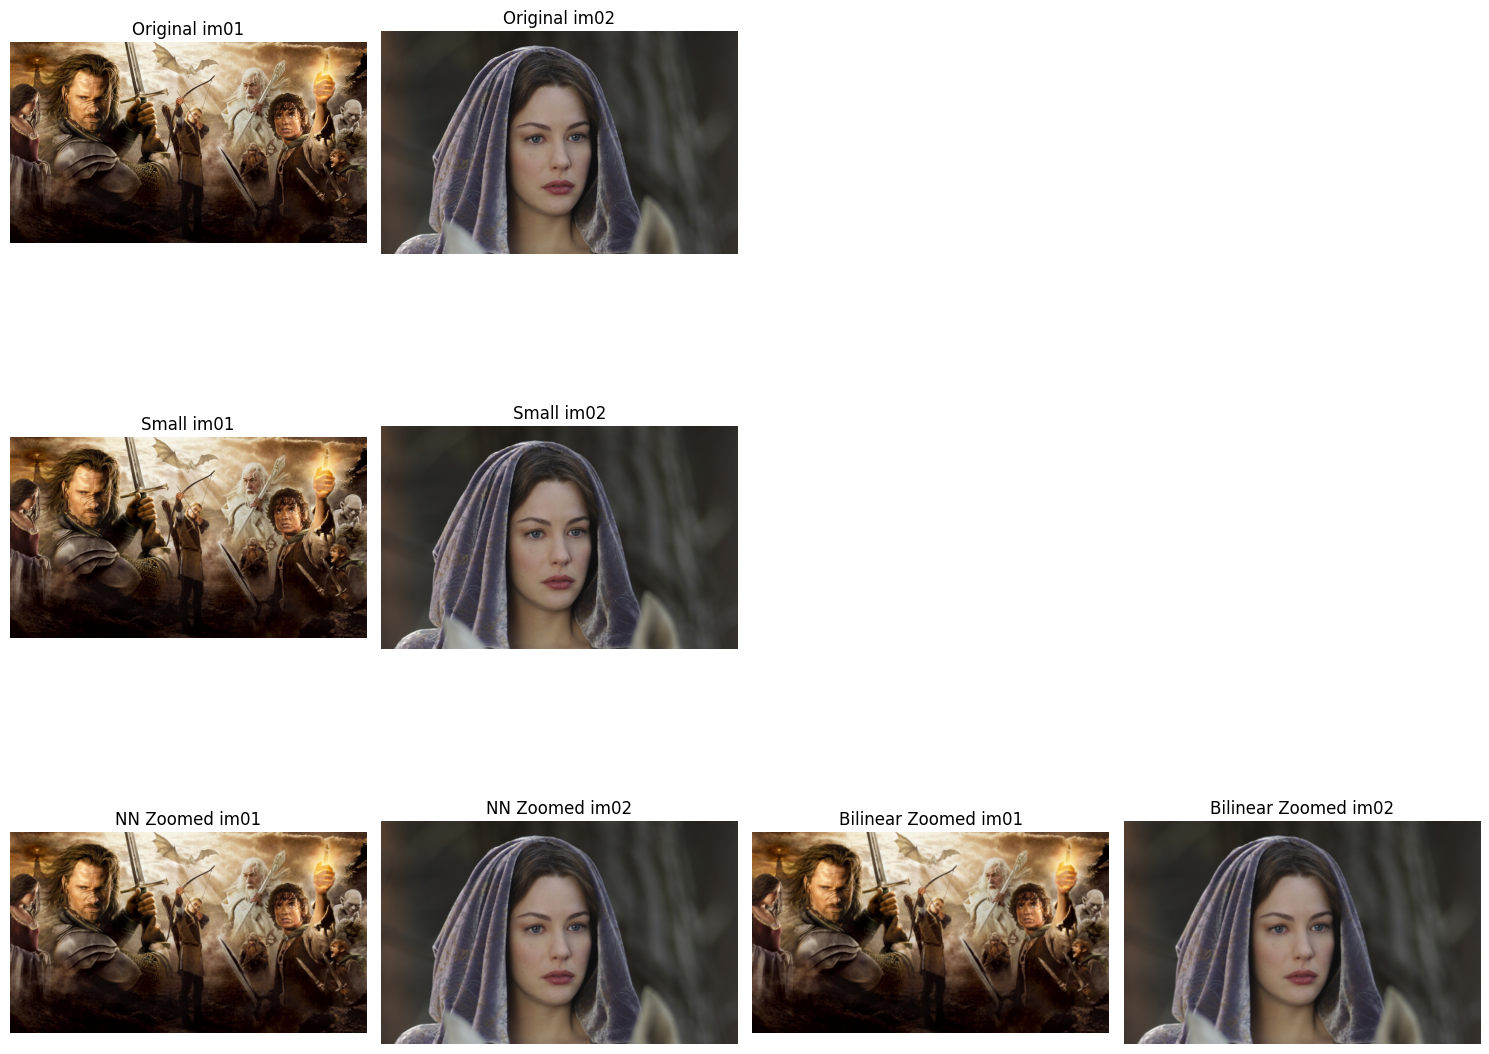

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zoom(img, technique='nn', scale=4):
    if technique == 'nn':
        interpolation = cv2.INTER_NEAREST
    elif technique == 'bilinear':
        interpolation = cv2.INTER_LINEAR
    else:
        raise ValueError("Technique must be 'nn' or 'bilinear'")
    
    new_width = int(img.shape[1] * scale)
    new_height = int(img.shape[0] * scale)
    zoomed_img = cv2.resize(img, (new_width, new_height), interpolation=interpolation)
    
    return zoomed_img

def compute_ssd(img1, img2):
    if img1.shape != img2.shape:
        img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation=cv2.INTER_LINEAR)
    
    ssd = np.sum((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)
    normalized_ssd = ssd / (img1.shape[0] * img1.shape[1])
    return normalized_ssd

im01 = cv2.imread('./a1images/a1images/a1q5images/im01.png')
im02 = cv2.imread('./a1images/a1images/a1q5images/im02.png')

im01small = cv2.imread('./a1images/a1images/a1q5images/im01small.png')
im02small = cv2.imread('./a1images/a1images/a1q5images/im02small.png')

if im01 is not None and im02 is not None and im01small is not None and im02small is not None:
    # Nearest Neighbor
    im01small_zoomed_nn = zoom(im01small, technique='nn', scale=4)
    im02small_zoomed_nn = zoom(im02small, technique='nn', scale=4)

    # Bilinear Interpolation
    im01small_zoomed_bilinear = zoom(im01small, technique='bilinear', scale=4)
    im02small_zoomed_bilinear = zoom(im02small, technique='bilinear', scale=4)

    ssd_im01_nn = compute_ssd(im01, im01small_zoomed_nn)
    ssd_im02_nn = compute_ssd(im02, im02small_zoomed_nn)
    ssd_im01_bilinear = compute_ssd(im01, im01small_zoomed_bilinear)
    ssd_im02_bilinear = compute_ssd(im02, im02small_zoomed_bilinear)

    print(f"SSD for im01small.png (Nearest Neighbor): {ssd_im01_nn:.5f}")
    print(f"SSD for im02small.png (Nearest Neighbor): {ssd_im02_nn:.5f}")
    print(f"SSD for im01small.png (Bilinear): {ssd_im01_bilinear:.5f}")
    print(f"SSD for im02small.png (Bilinear): {ssd_im02_bilinear:.5f}")

    plt.figure(figsize=(15, 12))

    # Original Images
    plt.subplot(3, 4, 1)
    plt.imshow(cv2.cvtColor(im01, cv2.COLOR_BGR2RGB))
    plt.title('Original im01')
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.imshow(cv2.cvtColor(im02, cv2.COLOR_BGR2RGB))
    plt.title('Original im02')
    plt.axis('off')

    # Small Images
    plt.subplot(3, 4, 5)
    plt.imshow(cv2.cvtColor(im01small, cv2.COLOR_BGR2RGB))
    plt.title('Small im01')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.imshow(cv2.cvtColor(im02small, cv2.COLOR_BGR2RGB))
    plt.title('Small im02')
    plt.axis('off')

    # Nearest Neighbor Zoomed
    plt.subplot(3, 4, 9)
    plt.imshow(cv2.cvtColor(im01small_zoomed_nn, cv2.COLOR_BGR2RGB))
    plt.title('NN Zoomed im01')
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.imshow(cv2.cvtColor(im02small_zoomed_nn, cv2.COLOR_BGR2RGB))
    plt.title('NN Zoomed im02')
    plt.axis('off')

    # Bilinear Zoomed
    plt.subplot(3, 4, 11)
    plt.imshow(cv2.cvtColor(im01small_zoomed_bilinear, cv2.COLOR_BGR2RGB))
    plt.title('Bilinear Zoomed im01')
    plt.axis('off')

    plt.subplot(3, 4, 12)
    plt.imshow(cv2.cvtColor(im02small_zoomed_bilinear, cv2.COLOR_BGR2RGB))
    plt.title('Bilinear Zoomed im02')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Could not load one or more images. Please check file paths.")